# Limpeza de Dados no Dataset Titanic

* O dataset <a href=https://www.kaggle.com/datasets/yasserh/titanic-dataset>Titanic</a> é utilizado para competições e está disponível na plataforma Kaggle.


* <b>Descrição dos metadados:</b>
    * Survived: sobrevivência (0=não, 1=sim)
    * Pclass: Classe do bilhete (1 = 1°, 2 = 2° e 3 = 3°)
    * Sex: Genêro (male, female)
    * Age: Idade em anos "float" (24.0, 32.0 ...)
    * Sibsp: N° de irmãos/cônjugues a bordo do Titanic
    * Parch: N° de pais/filhos a bordo do Titanic
    * Ticket: N° do bilhete
    * Fare: Tarifa do passageiro 
    * Cabin: N° da cabine
    * Embarked: local de embarcação (C = Cherbourg, Q = Queenstown, S = Southampton)


In [1]:
# Importando pandas
import pandas as pd

In [2]:
# Importando base de dados
df = pd.read_csv('Dataset/titanic.csv')

In [3]:
# Visualizando a base de dados para melhor compreensão
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
# Quantas linhas e colunas possui essa base?
df.shape

(891, 12)

In [5]:
# Informações mais detalhadas sobre a base --> (Quais os tipos de cada coluna? Linhas não nulas...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Resumo estatístico da base de dados
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# A cardinalidade de cada coluna (Quantos valores únicos eu tenho em cada coluna?)
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
# Vizualizar valores vazios
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3>As etapas acima fazem parte de uma pequena análise exploratória de dados, visando uma compreensão mais aprofundada dos nossos dados antes da fase de limpeza.</h3>

<h3>Verificando os valores vazios</h3>

* <h4>Começando pelo embarque</h4>

    * Após o comando df.isnull().sum() anterior, é possível verificar que 2 registros estão vazios.

In [9]:
# Verificando os registros com o embarque vazio
df[df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


* <b>Verificando no google o nome de <a href="https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html">Martha Evelyn</a> e <a href="https://www.encyclopedia-titanica.org/titanic-survivor/amelia-icard.html">Amelia Icard</a>, consegue-se verificar a informação de que ambas embarcaram em Southampton, representado por "S" na base de dados.</b>


* Similar ao processo de busca no google, dentro das organizações um analista de dados pode interagir com o setor relacionado aos dados para verificar se aquela determinada informação faz sentido.

In [10]:
# Atualizando o valor para as duas linhas, já que ambas estavam embarcadas em Southampton
df.loc[df.Embarked.isnull(), "Embarked"] = "S"

* <b>Analisando a idade</b>

In [11]:
# Verificando quantos valores nulos eu tenho no campo idade
df[df.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


* Será que vale a pena fazer como no embarque, procurando cada pessoa individualmente e colocando sua respectiva idade?
* Obviamente que fazer isso manualmente não seria viável pois são <b>177 linhas</b> sem idade.


* Uma alternativa seria criar um bot para essa tarefa, mas a abordagem que vou utilizar vai ser analisar estatísticamente os dados e definir um valor para as idades vazias.

In [12]:
# Usando describe para analisar as idades
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot: >

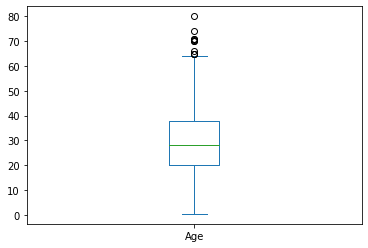

In [13]:
# Essa análise das idades também pode ser feita utilizando um boxplot
df.Age.plot.box()

* Observando o boxplot, é possível perceber que se tem alguns outliers nas faixas etárias. Mas nada que seja surpreendente, afinal é totalmente possível uma idade de 80 anos.


* O que está acontecendo é que se tem algumas idades que não estão próximas da distribuição de dados.

<AxesSubplot: ylabel='Frequency'>

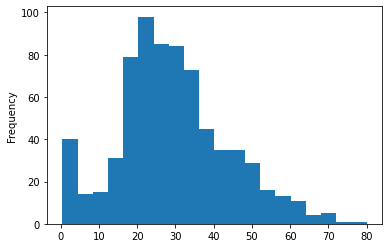

In [14]:
# Visualizando num histograma / bins=20 aumenta as barras pra 20
df.Age.plot.hist(bins=20)

<h4>É possível notar que esse histograma tem um formato de sino, indicando ser uma distribuição normal (gaussiana)</h4>.

* Nesse tipo de distribuição a maioria dos dados está concentrada em torno da média, com uma queda gradual nas caudas.
    

In [15]:
# Uma opção seria usar a mediana ou a média das idades para preencher as idades vazias.
df.Age.median()

28.0

* Um bom questionamento seria pensar: Será que as idades variam por classe? 
* Trazer essa mediana por classe tornaria o valor mais preciso para preencher os valores vazios.

In [16]:
# Trazendo a mediana das idades por classe
df.groupby('Pclass')['Age'].median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

* E se eu também filtrar por genêro, as idades ficariam ainda mais precisas, não?


* <b>Nota:</b> É necessário o cuidado ao específicar muitas colunas. Se houver valores extremos (outliers) em alguma classe ou gênero, a média pode ser sensível a esses valores atípicos e não refletir adequadamente a tendência central.

In [17]:
# Trazendo a mediana das idades por classe e genêro
df.groupby(['Pclass', 'Sex'])['Age'].median()

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

<h4>Agora vamos pegar essas idades obtidas, e inseri-las nos registros vazios de acordo com a classe e o genêro</h4>

* Para isso criar uma nova coluna utilizando o transform do Pandas.

In [18]:
df["Check1"] = df.groupby(['Pclass', 'Sex'])['Age'].transform("median")

In [19]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Check1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21.5


* Observe que foi criado uma nova coluna "Check1" que me diz a mediana da idade de todo mundo pela filtragem de classe e genêro.

* Mas o que eu quero é colocar essa idade apenas para aquelas idades que estão vazias.

In [20]:
# criando uma nova coluna que me diz a mediana das idades por classe, genêro e que não tenham valor no campo idade.
df["Check2"] = df.Age.fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform("median"))

In [21]:
# Visualizando por linhas que tem idade vazia
df[df.Age.isnull()].head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Check1,Check2
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,25.0,25.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,30.0,30.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,21.5,21.5


In [22]:
# Visualizando a tabela sem filtros
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Check1,Check2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,25.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21.5,26.0


* Perceba que no campo "Check2" o novo valor só é colocado se o campo não tiver idade, caso ele já tenha, o valor original da idade é colocado.

In [23]:
# Usar esse filtro criado para fazer essa substituição na coluna original "Age"
df['Age'] = df.Age.fillna(df.groupby(['Pclass', 'Sex'])['Age'].transform("median"))

In [24]:
# Apagar as colunas check1 e check2 que serviram apenas para o racciocínio
df = df.drop(['Check1', 'Check2'], axis=1)

In [25]:
# Verificar se existe algum valor nulo para idade e os outros dados
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

* <b>Analisando a cabine</b>
    * Percebe-se que existem muitos valores vazios

In [26]:
df.Cabin.value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

* Pelo fato dessa coluna ter tantos valores ausentes e essa informação de cabine não ser tão relevante na minha prespectiva, eu vou apenas eliminar essa coluna

In [27]:
df = df.drop('Cabin', axis=1)

<h4>Após essa etapa é possível que todos os valores nulos foram tratados</h4>

In [28]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<h3>Verificando a existência de outliers</h3>

In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* De cara é possível perceber que a tarifa ("Fare") possui um valor muito alto comparado com o minínmo


* Será que realmente tem uma taxa de 512?

<AxesSubplot: >

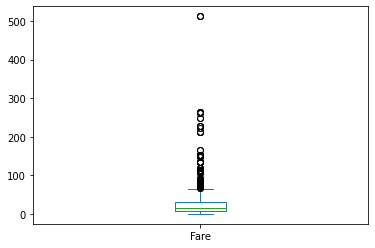

In [30]:
# Usando o boxplot para verificar a taxa
df.Fare.plot.box()

In [31]:
# Filtrando esse valor alto
df[df.Fare == df.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


* Mesmo que esse outlier esteja correto, é necessário parar para entender se faz sentido para os dados
    * Esse valor pode existir?
    * Ele faz sentido comparado com as outras taxas?
    * Ele pode ocorrer novamente?
    * Etc ...

<h3>Analisando a base</h3>

In [32]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


* Uma limpeza final possível é remover a coluna ticket, pois é uma coluna que não traz valores padrões para os tickets e não traz nenhum utilidade para se trabalhar.

In [33]:
# removendo a coluna ticket
df = df.drop('Ticket', axis=1)

<h3>Base de dados limpa</h3>

* Sem valores nulos
    
* Sem campos desnecessários
    
* Base de dados tratada

In [34]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [35]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [36]:
# Visualizando as informações após a base limpa
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB
